# Unsupervised Learning 

- [Lab 1: Principal Component Analysis](#Lab-1:-Principal-Component-Analysis)
- [Lab 2: K-Means Clustering](#Lab-2:-Clustering)
- [Lab 2: Hierarchical Clustering](#10.5.3-Hierarchical-Clustering)
- [Lab 3: NCI60 Data Example](#Lab-3:-NCI60-Data-Example)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

## Lab 1: Principal Component Analysis

In [2]:
# indexing by the first column: states level data

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv', index_col=0)
df.head()

# df = pd.read_csv('USArrests.csv', index_col=0)
# df.info()



,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [7]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [3]:
# scale the data

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

PCA().fit(X).components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [10]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings



,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [8]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()

# fit, transform, label the column
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


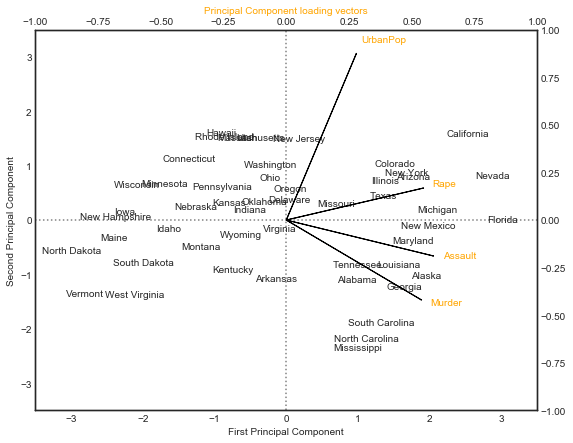

In [11]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

In [12]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [13]:
# figure out the explain power
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [14]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

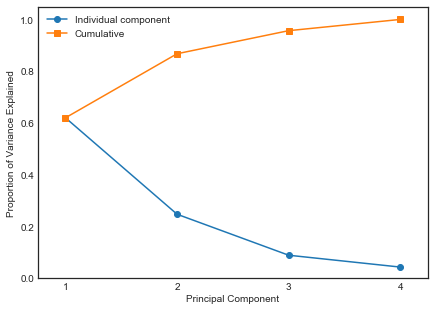

In [15]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

## Lab 2: Clustering

### K-Means Clustering

In [15]:
# prep data: scaling

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

#### K = 2

In [12]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# extract the labels
km1.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

See plot for K=2 below.

In [36]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km1.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

#Note that original means are zero centered, so you can compare these categories to a mean of zero for all columns in your 
#scaled data

# HOW WOULD YOU CATEGORIZE STATES IN EACH CLUSTER?  HOW WERE OBSERVATIONS CATEGORIZED?

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,1.015137,1.024120,0.199591,0.855564
1,-0.676758,-0.682747,-0.133061,-0.570376


####  K = 3

In [30]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [22]:
# center for visulization
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [23]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2])

In [24]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939726

In [42]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km2.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

#Note that original means are zero centered, so you can compare these categories to a mean of zero for all columns in your 
#scaled data

# HOW WOULD YOU CATEGORIZE STATES IN EACH CLUSTER?  HOW WERE OBSERVATIONS CATEGORIZED?

#print groups by index values to see states
X.groupby('cluster').groups

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,1.015137,1.024120,0.199591,0.855564
1,-0.451517,-0.350032,0.483666,-0.259750
2,-0.971303,-1.117836,-0.939550,-0.976578


{0: Index(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida',
        'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
        'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York',
        'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
       dtype='object'),
 1: Index(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas',
        'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington',
        'Wyoming'],
       dtype='object'),
 2: Index(['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana',
        'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
        'West Virginia', 'Wisconsin'],
       dtype='object')}

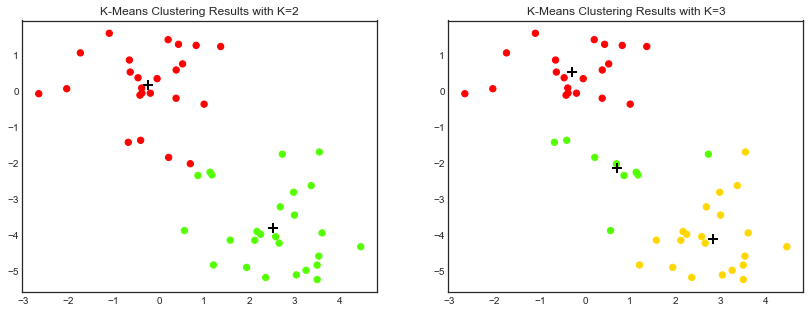

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

# 1. Now use K means clustering to generate 4 categories from this data and then evaluate what the clusters mean

In [5]:
np.random.seed(4)
km4 = KMeans(n_clusters=4, n_init=20)
km4.fit(X)
pd.Series(km4.labels_).value_counts()


0    16
2    13
1    13
3     8
dtype: int64

In [8]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km4.labels_

import pandas as pd
 # means for full scaled data
print(X.groupby('cluster').mean()) #cluster means

#Note that original means are zero centered, so you can compare these categories to a mean of zero for all columns in your 
#scaled data

# HOW WOULD YOU CATEGORIZE STATES IN EACH CLUSTER?  HOW WERE OBSERVATIONS CATEGORIZED?

#print groups by index values to see states
X.groupby('cluster').groups

           Murder   Assault  UrbanPop      Rape
cluster                                        
0       -0.494407 -0.386484  0.581676 -0.264310
1        0.702127  1.049994  0.729974  1.289904
2       -0.971303 -1.117836 -0.939550 -0.976578
3        1.426224  0.883211 -0.822791  0.019467


{0: Index(['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas',
        'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington',
        'Wyoming'],
       dtype='object'),
 1: Index(['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois',
        'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York',
        'Texas'],
       dtype='object'),
 2: Index(['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana',
        'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
        'West Virginia', 'Wisconsin'],
       dtype='object'),
 3: Index(['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi',
        'North Carolina', 'South Carolina', 'Tennessee'],
       dtype='object')}

# 2. Can you use the following code to generate 4 categories using Hierarchical clustering?  Are the categories the same?



In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4,   # note that we select the clusters
                             affinity='euclidean', 
                             linkage='complete')

labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
print(labels)

[2 0 0 1 0 0 3 3 0 2 3 1 0 3 1 3 1 2 1 0 3 0 1 2 0 1 1 0 1 3 0 0 2 1 3 3 3
 3 3 2 1 2 0 3 1 3 3 1 1 3]


In [26]:
ac.fit(X.iloc[:,0:-1])
pd.Series(ac.labels_).value_counts()

1    21
2    11
3    10
0     8
dtype: int64

In [27]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['acluster'] = ac.labels_

import pandas as pd
 # means for full scaled data
print(X.groupby('acluster').mean()) #cluster means

#Note that original means are zero centered, so you can compare these categories to a mean of zero for all columns in your 
#scaled data

# HOW WOULD YOU CATEGORIZE STATES IN EACH CLUSTER?  HOW WERE OBSERVATIONS CATEGORIZED?

#print groups by index values to see states
X.groupby('acluster').groups

            Murder   Assault  UrbanPop      Rape
acluster                                        
0         1.461013  0.993817 -0.840237  0.356494
1        -0.444501 -0.439803  0.364422 -0.285912
2         0.757594  1.131283  0.945679  1.227985
3        -1.068711 -1.115878 -1.133343 -1.035563


{0: Index(['Alabama', 'Alaska', 'Georgia', 'Louisiana', 'Mississippi',
        'North Carolina', 'South Carolina', 'Tennessee'],
       dtype='object'),
 1: Index(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas',
        'Kentucky', 'Massachusetts', 'Minnesota', 'Missouri', 'New Jersey',
        'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah',
        'Virginia', 'Washington', 'Wisconsin', 'Wyoming'],
       dtype='object'),
 2: Index(['Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland',
        'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas'],
       dtype='object'),
 3: Index(['Idaho', 'Iowa', 'Maine', 'Montana', 'Nebraska', 'New Hampshire',
        'North Dakota', 'South Dakota', 'Vermont', 'West Virginia'],
       dtype='object')}